In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. 리뷰수와 평점과의 관계
2. 할인율과 제품 인기 사이의 관계는?
3. 리뷰수가 높은 제품의 종류 
4. 배송 시간이 제품 평점에 미치는 영향 

In [2]:
# Set file path
file_path = '/Users/jiminking/Desktop/LA/WebScraping/coupang_baby_preprocessed.csv'

# Load data to pandas DataFrame
data = pd.read_csv(file_path)

# Data information
print(data.info())
print(data.tail())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   item_name_           771 non-null    object
 1   original_price       771 non-null    int64 
 2   sale_price           771 non-null    int64 
 3   rating_score         771 non-null    int64 
 4   total_reviews        771 non-null    int64 
 5   item_info            756 non-null    object
 6   discount_percentage  771 non-null    int64 
 7   delivery_guarantee   771 non-null    int64 
 8   delivery_days        771 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 54.3+ KB
None
                      item_name_  original_price  sale_price  rating_score  \
766            랄랄라 사운드 벽보 8: 구구단            5000        3150            90   
767                   종이나라 투명나라풀           14400        6630            90   
768         지앤마 써니비 남아용 1단계 유아칫솔            9900        8550       

,item_name_,original_price,sale_price,rating_score,total_reviews,item_info,discount_percentage,delivery_guarantee,delivery_days
0,주니 유아용 자기주도 빨대컵 210ml,35000,25000,90,119,"화이트, 1개",28,1,1
1,한글떼기 1~5과정 세트 전5권(개정판)(유아4~7세),30000,27000,100,1692,기탄출판,10,1,1
2,초등 미니 논술 일력 365,19800,17820,100,18,서사원주니어,10,1,1
3,락피도 철분 키즈,37000,16540,100,2905,"90g, 1개",55,1,1
4,아토팜 판테놀 유아 크림,47000,24110,100,740,"100ml, 1개",48,1,1


In [3]:
# Basic statistical measures for 'sale_price', 'original_price'
mean_original_price = round(data['original_price'].mean())
median_original_price = round(data['original_price'].median())
std_dev_original_price = round(data['original_price'].std())

mean_sale_price = round(data['sale_price'].mean())
median_sale_price = round(data['sale_price'].median())
std_dev_sale_price = round(data['sale_price'].std())


print(f"Original price - Mean: {mean_original_price} 원, Median: {median_original_price} 원, Std Dev: {std_dev_original_price}원")
print(f"Sale price - Mean: {mean_sale_price} 원, Median: {median_sale_price} 원, Std Dev: {std_dev_sale_price}원")

Original price - Mean: 25742 원, Median: 19900 원, Std Dev: 18983원
Sale price - Mean: 18811 원, Median: 13500 원, Std Dev: 15075원


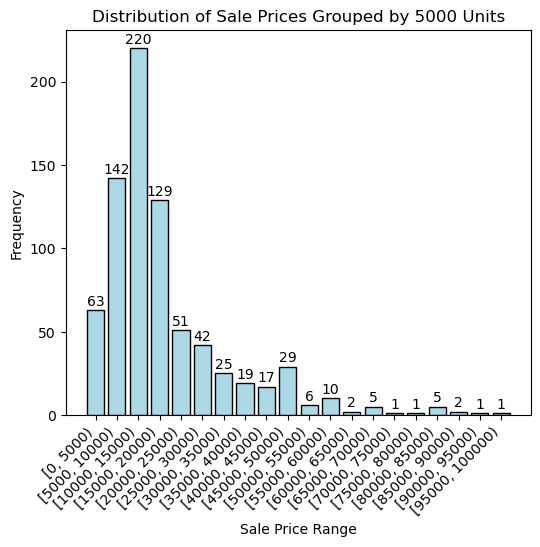

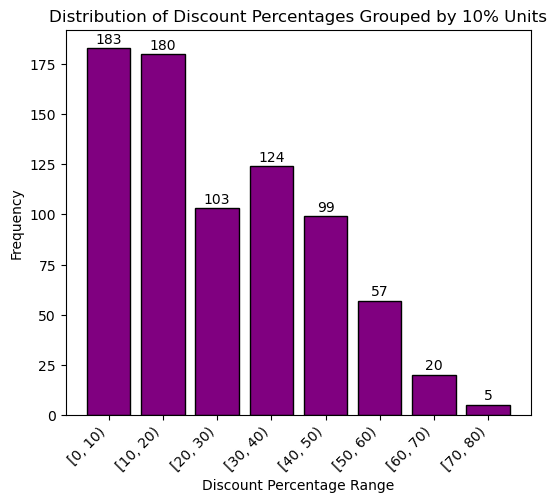

In [4]:
# grouby 5000 units
groupby_sale_price_bins = range(0, int(data['sale_price'].max()) + 5000, 5000)
data['groupby_sale_price'] = pd.cut(data['sale_price'], bins=groupby_sale_price_bins, right=False)

# Calculating the frequency of each adjusted price group
groupby_sale_price_frequency = data['groupby_sale_price'].value_counts().sort_index()

# plot 
plt.figure(figsize=(6, 5))
bars = plt.bar(groupby_sale_price_frequency.index.astype(str), groupby_sale_price_frequency.values, color='lightblue', edgecolor='black')

# label on top of the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.title('Distribution of Sale Prices Grouped by 5000 Units')
plt.xlabel('Sale Price Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.show()


# 10% units for gourouping discount
discount_bins = range(0, int(data['discount_percentage'].max()) + 10, 10)
data['discount_group'] = pd.cut(data['discount_percentage'], bins=discount_bins, right=False)

discount_group_frequency = data['discount_group'].value_counts().sort_index()

# plot
plt.figure(figsize=(6, 5))
bars = plt.bar(discount_group_frequency.index.astype(str), discount_group_frequency.values, color='purple', edgecolor='black')

# label on top of the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.title('Distribution of Discount Percentages Grouped by 10% Units')
plt.xlabel('Discount Percentage Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.show()

In [5]:
# Sorting the dataframe by 'total_reviews' in descending order to see the most popular items first
df_sorted_by_reviews = data.sort_values(by='total_reviews', ascending=False).reset_index(drop=True)
df_sorted_by_reviews.head(10)

,item_name_,original_price,sale_price,rating_score,total_reviews,item_info,discount_percentage,delivery_guarantee,delivery_days,groupby_sale_price,discount_group
0,코멧 아기물티슈 오리지널 캡형 50평량,18000,10990,100,337867,"100매, 10팩",38,1,1,"[10000, 15000)","[30, 40)"
1,코멧 아기물티슈 오리지널 캡형 50평량,34900,21490,100,337867,"100매, 20팩",38,1,1,"[20000, 25000)","[30, 40)"
2,베베앙 오리지널 플러스 아기물티슈 캡형 55평량,49800,27830,100,293951,"100매, 20개",44,1,1,"[25000, 30000)","[40, 50)"
3,베베앙 오리지널 플러스 아기물티슈 캡형 55평량,24900,13980,100,293951,"100매, 10개",43,1,1,"[10000, 15000)","[40, 50)"
4,코멧 저자극 시그니처 아기 물티슈 엠보싱 캡형 55평량,23900,12790,100,265113,"100매, 10팩",46,1,1,"[10000, 15000)","[40, 50)"
5,코멧 저자극 시그니처 아기 물티슈 엠보싱 캡형 55평량,36900,24990,100,265113,"100매, 20팩",32,1,1,"[20000, 25000)","[30, 40)"
6,고려은단 비타민C 1000,36000,27950,100,193297,"300정, 1개",22,0,1,"[25000, 30000)","[20, 30)"
7,고려은단 비타민C 1000 + 쇼핑백,36000,33790,100,193297,"180정, 2개",6,1,1,"[30000, 35000)","[0, 10)"
8,베베숲 센시티브 엠보싱 물티슈 휴대캡형 65gsm,26200,22900,100,151537,"80매, 10개",12,0,2,"[20000, 25000)","[10, 20)"
9,베베숲 저자극 제로 물티슈 캡형 55평량,42000,38800,100,132695,"80개입, 20개",7,0,2,"[35000, 40000)","[0, 10)"


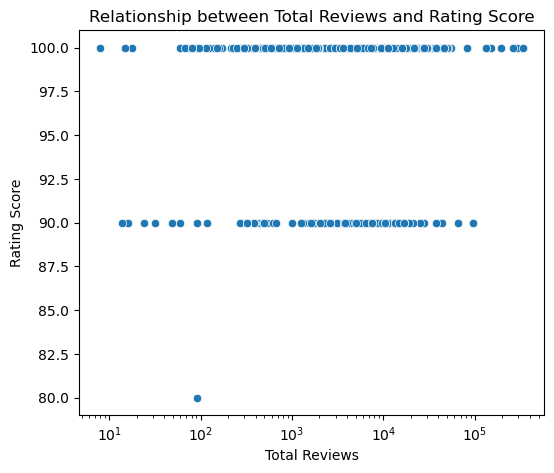

In [6]:
# 1. 리뷰수와 평점과의 관계
plt.figure(figsize=(6, 5))
sns.scatterplot(x='total_reviews', y='rating_score', data=data)
plt.title('Relationship between Total Reviews and Rating Score')
plt.xlabel('Total Reviews')
plt.ylabel('Rating Score')
plt.xscale('log')  
plt.show()


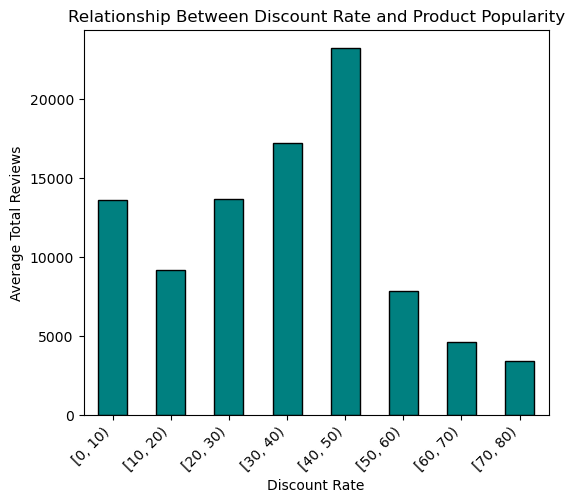

In [7]:
""""
1. What is the relationship between the discount rate and the popularity of the product?
"""

# Grouping data by discount group and calculating the average number of total reviews for each group
average_reviews_by_discount = data.groupby('discount_group')['total_reviews'].mean()

# Plotting the relationship between discount rate and product popularity (measured by average total reviews)
plt.figure(figsize=(6, 5))
average_reviews_by_discount.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Relationship Between Discount Rate and Product Popularity')
plt.xlabel('Discount Rate')
plt.ylabel('Average Total Reviews')
plt.xticks(rotation=45, ha="right")
plt.show()


In [8]:
"""
 3. Types of products with high number of reviews
"""

# # Extract unique product names by removing parts representing capacity such as 'flat', 'hawk', and 'pack' from product names
data['unique_item_name'] = data['item_name_'].str.extract(r'([^\d]+)')  # Extraction of non-numerical parts

# Group by unique product name to aggregate the number of reviews
grouped_data = data.groupby('unique_item_name')['total_reviews'].sum().sort_values(ascending=False)

# top 20
print(grouped_data.head(20))

unique_item_name
코멧 아기물티슈 오리지널 캡형                    675734
베베앙 오리지널 플러스 아기물티슈 캡형               587902
코멧 저자극 시그니처 아기 물티슈 엠보싱 캡형           530226
하기스                                 426141
베베숲 저자극 제로 물티슈 캡형                   398085
고려은단 비타민C                           386594
원포 임신테스트기                           326645
코멧 아기 물티슈 라이트 캡형                    290685
베베숲 시그니처 블루 유아물티슈 캡형                249816
상하목장 베이비 유기농 요거트                    185816
베베숲 센시티브 엠보싱 물티슈 휴대캡형               151537
벨레다 어린이 치약                          151144
브라운 프리미엄 옐로우 저자극 엠보싱 아기물티슈 휴대캡형     133593
도담이 소프트 플레인 유아물티슈 캡형                129826
하기스 NEW 네이처메이드 밴드형 기저귀 아동공용         127480
앱솔루트 명작                             114418
상하목장 베이비 유기농 요거트 딸기 바나나             111864
일동후디스 아이얌 유기농 쌀과자 떡뻥                111796
브라운 프리미엄 옐로우 저자극 엠보싱 아기물티슈 캡형        89062
상하목장 베이비 유기농 요거트 사과당근                87076
Name: total_reviews, dtype: int64


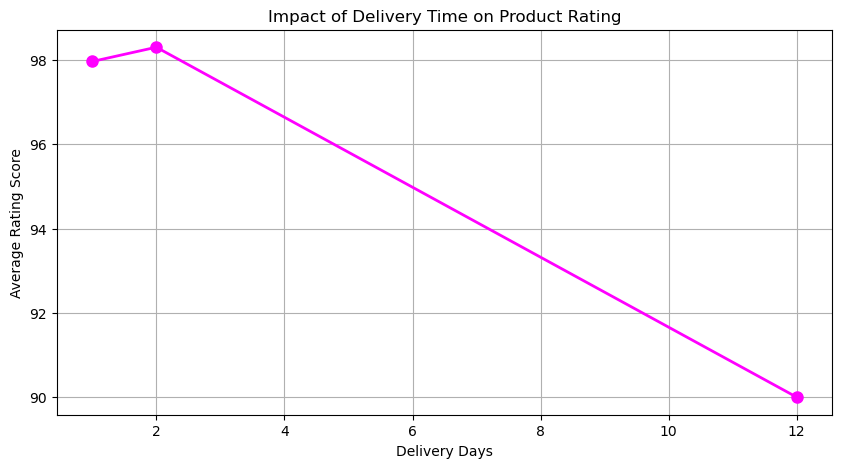

In [9]:
"""
4. Product rating and delivery period relationship
"""

# Grouping data by delivery days and calculating the average rating score for each group
average_rating_by_delivery = data.groupby('delivery_days')['rating_score'].mean()

# Plotting the relationship between delivery time and product rating
plt.figure(figsize=(10,5))
average_rating_by_delivery.plot(kind='line', color='magenta', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title('Impact of Delivery Time on Product Rating')
plt.xlabel('Delivery Days')
plt.ylabel('Average Rating Score')
plt.grid(True)
plt.show()
